In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
from sklearn.preprocessing import scale 
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import roc_auc_score,roc_curve
import statsmodels.formula.api as smf
from sklearn.linear_model import LogisticRegression
from warnings import filterwarnings
filterwarnings('ignore')

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/breast-cancer-wisconsin-data/data.csv


In [2]:
import pandas as pd
df = pd.read_csv("../input/breast-cancer-wisconsin-data/data.csv")
data = df.copy()
data.drop(["Unnamed: 32", "id"], axis=1, inplace=True)                  # Unnamed: 32 sutunu veriye baktigimizda nan lardan olusuyor ondan drop edelim
data.diagnosis = [1 if each == "M" else 0 for each in data.diagnosis]   # binary yani 0 ile 1 degerlerden olusturmamiz gerekiyor. object lerden olusuyor bunun yerine 0 ile 1 lerden olurmali. cunku bize int veya float lazim
data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [3]:
data.describe()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.372583,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,0.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [4]:
y = data.diagnosis.values
x_data = data.drop(["diagnosis"], axis=1)

In [5]:
# x degerlerimiz baktigimizda degerlerin cok buyuk oldugu gorulur. Dolayisiyla verimizi normallestirmemiz gerekiyor

#*** Normalize ***#
x = (x_data - np.min(x_data))/(np.max(x_data) - np.min(x_data)).values

In [6]:
X_train, X_test, y_train, y_test = train_test_split(x, y, 
                                                    test_size=0.30, 
                                                    random_state=42)

# Logistic Regresyon

* Amac henuz gozlenmemis bir x deger seti geldiginde bunun sonucunda olusacak olan sinifi ortaya cikarmak tahmin etmek bir siniflandirici cikarmaktir.
* Siniflandirma problemi icin bagimli ve bagimsiz degiskenler arasindaki iliskiyi tanimlayan linear bir model kurmaktir.
* Bagimli degiskenin 1 yada 0 olmasi durumuyla ilgilenir yada evet veya hayir durumu
* Bize int veya float degerlerle is yapar

## MODEL


In [7]:
# statsmodels araciligiyla model kurup fit yapalim. Burda bize modelin anlamliligi ve hangi degiskenin ne kadar etki ettigi bu tablodan cikiyor

loj = sm.Logit(y, x)
loj_model= loj.fit()
loj_model.summary()

Optimization terminated successfully.
         Current function value: 0.033148
         Iterations 18


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                  569
Model:                          Logit   Df Residuals:                      539
Method:                           MLE   Df Model:                           29
Date:                Sun, 24 Nov 2019   Pseudo R-squ.:                  0.9498
Time:                        23:10:07   Log-Likelihood:                -18.861
converged:                       True   LL-Null:                       -375.72
Covariance Type:            nonrobust   LLR p-value:                1.349e-131
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
radius_mean              -776.2516    548.883     -1.414      0.157   -1852.042     299.539
texture_mean               16.2434     15.368      1.057      0.291     -13.878      46.365
perimeter_mean            -46.7682    454.002     -0.103      0.918    -936.595     843.059
area_mean                 809.5915    383.972      2.108      0.035      57.020    1562.163
smoothness_mean            36.2165     23.026      1.573      0.116      -8.914      81.347
compactness_mean          -60.0872     41.613     -1.444      0.149    -141.647      21.473
concavity_mean             52.2058     46.582      1.121      0.262     -39.094     143.506
concave points_mean        83.7614     42.373      1.977      0.048       0.713     166.810
symmetry_mean             -15.7779     10.997     -1.435      0.151     -37.332       5.776
fractal_dimension_mean    -25.5319     16.793     -1.520      0.128     -58.446       7.382
radius_se                -252.2700    154.717     -1.631      0.103    -555.510      50.970
texture_se                -18.2785     15.290     -1.195      0.232     -48.246      11.689
perimeter_se              -30.5058     98.122     -0.311      0.756    -222.821     161.809
area_se                   692.8943    348.236      1.990      0.047      10.364    1375.424
smoothness_se             -12.9334     17.775     -0.728      0.467     -47.772      21.905
compactness_se             37.1289     31.568      1.176      0.240     -24.743      99.001
concavity_se             -182.3658     73.609     -2.477      0.013    -326.638     -38.094
concave points_se         121.6237     52.644      2.310      0.021      18.444     224.804
symmetry_se               -36.4186     20.888     -1.743      0.081     -77.359       4.522
fractal_dimension_se     -107.6756     63.374     -1.699      0.089    -231.886      16.535
radius_worst              392.1998    301.646      1.300      0.194    -199.016     983.415
texture_worst              23.8124     15.523      1.534      0.125      -6.612      54.237
perimeter_worst           -54.5011    167.138     -0.326      0.744    -382.085     273.083
area_worst               -239.6816    321.974     -0.744      0.457    -870.740     391.377
smoothness_worst          -23.3254     17.985     -1.297      0.195     -58.575      11.924
compactness_worst         -31.2236     43.900     -0.711      0.477    -117.265      54.818
concavity_worst            68.7585     44.612      1.541      0.123     -18.680     156.197
concave points_worst      -33.9163     24.478     -1.386      0.166     -81.893      14.061
symmetry_worst             53.9307     24.863      2.169      0.030       5.200     102.661
fractal_dimension_worst    81.5280     44.225      1.843      0.065      -5.151     168.207
===========================================================================================

Possibly complete quasi-separation: A fraction 0.85 of observations can be
perfectly predicted. This might indic

In [8]:
from sklearn.linear_model import LogisticRegression
loj = LogisticRegression(solver = "liblinear")
loj_model = loj.fit(x,y)
loj_model

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [9]:
# sabit degeri
loj_model.intercept_

array([-5.91441042])

In [10]:
# butun bagimsiz degiskenlerin katsayi degerleri
loj_model.coef_

array([[ 0.80573789,  0.95819785,  0.87721501,  1.14536414, -0.32978066,
         0.39822828,  1.9002178 ,  2.56167623, -0.27240361, -1.5580038 ,
         1.39126723, -0.38547609,  1.05924174,  0.97230597, -0.29580867,
        -0.75848345, -0.40886506, -0.17064902, -0.51005046, -0.69148048,
         1.80665348,  1.61569886,  1.67192506,  1.62521273,  0.84065015,
         0.7945425 ,  1.36596103,  2.46911017,  0.95016739,  0.23945105]])

## PREDICT and MODEL TUNNING

In [11]:
# tahmini yapalim
y_pred = loj_model.predict(x)

In [12]:
# Gercekte 1 iken 1(PP) olanlar 1 iken 0(PN) olanlar, gercekte 0 iken 1(NP) olanlar 0 iken 0(NN) olanlar
confusion_matrix(y, y_pred)

array([[355,   2],
       [ 17, 195]])

In [13]:
# accuracy degerine bakalim
accuracy_score(y, y_pred)

0.9666080843585237

In [14]:
# en detayli bir siniflandirma algoritmasinin sonuclarini degerlendirecek ciktilardan biri
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97       357
           1       0.99      0.92      0.95       212

    accuracy                           0.97       569
   macro avg       0.97      0.96      0.96       569
weighted avg       0.97      0.97      0.97       569



In [15]:
# ilk 10 model tahmini
loj_model.predict(x)[0:10]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [16]:
# yukarda 1 ve 0 verdigi degerlerden ziyade asil degerlerini versin istiyorsak 'predict_proba' modulunu kullanarak gercek degerleri
# matriste 0. indexinde veya sol tarafi 0 a ait degerleri, 1. indexinde veya sag tarafi 1 e ait degerleri verir 
loj_model.predict_proba(x)[0:10][:,0:2]                # ilk 10

array([[0.00268845, 0.99731155],
       [0.05645819, 0.94354181],
       [0.00782149, 0.99217851],
       [0.13471514, 0.86528486],
       [0.053086  , 0.946914  ],
       [0.37631826, 0.62368174],
       [0.04912011, 0.95087989],
       [0.45483902, 0.54516098],
       [0.14707554, 0.85292446],
       [0.0511242 , 0.9488758 ]])

In [17]:
# simdi yukardaki 'predict_proba' on tahmin olasilik degerlerini model haline getirmeye calisalim
y_probs = loj_model.predict_proba(x)
y_probs = y_probs[:,1]

In [18]:
y_probs[0:10]               # ilk 10

array([0.99731155, 0.94354181, 0.99217851, 0.86528486, 0.946914  ,
       0.62368174, 0.95087989, 0.54516098, 0.85292446, 0.9488758 ])

In [19]:
# burdaki tahmin degerlerimizi donguye sokup 0.5 ten buyuklere 1 ve kucuk olanlara 0 versin
y_pred = [1 if i > 0.5 else 0 for i in y_probs]

In [20]:
# yukardaki degere baktigimizda degisikligi farketmis oluruz ama burda degisiklik yok cunku dogrulanmasi gereken cok bir deger yokmus demekki. Bunu yapma amacimiz modelimizi dogrulamaktir.
y_pred[0:10]

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

In [21]:
confusion_matrix(y, y_pred)

array([[355,   2],
       [ 17, 195]])

In [22]:
accuracy_score(y, y_pred)

0.9666080843585237

In [23]:
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97       357
           1       0.99      0.92      0.95       212

    accuracy                           0.97       569
   macro avg       0.97      0.96      0.96       569
weighted avg       0.97      0.97      0.97       569



In [24]:
# bunu yukarda yaptik ilk 5 eleman gorunsun
loj_model.predict_proba(x)[:,1][0:5]

array([0.99731155, 0.94354181, 0.99217851, 0.86528486, 0.946914  ])

In [25]:
logit_roc_auc = roc_auc_score(y, loj_model.predict(x))

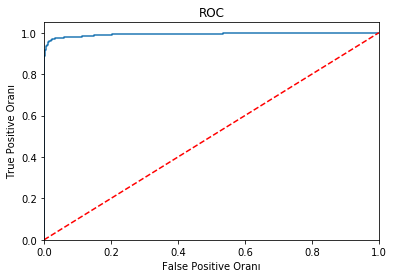

In [26]:
fpr, tpr, thresholds = roc_curve(y, loj_model.predict_proba(x)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='AUC (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Oranı')
plt.ylabel('True Positive Oranı')
plt.title('ROC')
plt.show()
# mavi cizgi kurmus oldugumuz model ile ilgili basarimizin grafigi
# kirmizi cizgi hicbirsey yapmasak modelimiz bu sekilde olacak


# Sekilde goruldugu gibi cok degistirilmesi veya dogrulanmasi gereken deger bulamadi bu veride.



In [27]:
# test train ayirma islemine tabi tutalim
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 42)

In [28]:
# Modelimizi olusturup fit edelim
loj = LogisticRegression(solver = "liblinear")
loj_model = loj.fit(X_train,y_train)
loj_model

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [29]:
# dogrulanma skorunu bulalim
accuracy_score(y_test, loj_model.predict(X_test))

0.9736842105263158

In [30]:
# dogrulanmis modelin CV skoru bulalim
cross_val_score(loj_model, X_test, y_test, cv = 10).mean()

0.940034965034965

# KNN (K-Nearst Neigbourhood)


* Tahminler gozlem benzerligine gore yapilir. Bana arkadasini soyle sana kim oldugunu soyleyeyeyim mantigi ile calisir.

* Bagimsiz degiskenler ile diger degiskenler arasindaki uzaklik hesaplanir. en yakin k adet gozlemi bulup bunun icin en yakin gozlenen sinif model sinifidir.

In [31]:
# model kurma
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn_model = knn.fit(X_train, y_train)
knn_model

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [32]:
# tahmin degeri
y_pred = knn_model.predict(X_test)

In [33]:
accuracy_score(y_test, y_pred)

0.9649122807017544

In [34]:
# detayli ciktimizida alalim. 
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97        71
           1       0.95      0.95      0.95        43

    accuracy                           0.96       114
   macro avg       0.96      0.96      0.96       114
weighted avg       0.96      0.96      0.96       114



##  MODEL TUNNING 

In [35]:
# KNN parametrelerini bulma
knn_params = {"n_neighbors": np.arange(1,50)}

In [36]:
# siniflandirmasi ve CV ile fit yapalim
knn = KNeighborsClassifier()
knn_cv = GridSearchCV(knn, knn_params, cv=10)
knn_cv.fit(X_train, y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=None,
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [37]:
# bunu sadece gozlemlemek icin yapiyoruz. Final modeli onemli bizim icin
print("En iyi skor:" + str(knn_cv.best_score_))
print("En iyi parametreler: " + str(knn_cv.best_params_))

En iyi skor:0.967032967032967
En iyi parametreler: {'n_neighbors': 7}


In [38]:
# yukarida ciktida ortaya cikan n_neighbors 11 cikmisti bunu kullanarak KNN olusturulup tuned edelim
knn = KNeighborsClassifier(11)
knn_tuned = knn.fit(X_train, y_train)

In [39]:
# simdide test in tuned score una bakalim
knn_tuned.score(X_test, y_test)

0.956140350877193

In [40]:
# tahmin degeri
y_pred = knn_tuned.predict(X_test)

In [41]:
accuracy_score(y_test, y_pred)

0.956140350877193

# SVC (Support Vector for Classification)

* Amac iki sinif arasindaki ayrimin(marjinin) optimum olmasini saglayacak hiper-duzlemi bulmaktir

* Linear ve NonLinear SVM ler mevcut.

In [42]:
# model ve nesne olusturma fit ile beraber yapalim
from sklearn.svm import SVC

svm_model = SVC(kernel = "linear").fit(X_train, y_train)

In [43]:
svm_model

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [44]:
y_pred = svm_model.predict(X_test)

In [45]:
accuracy_score(y_test, y_pred)

0.9824561403508771

## MODEL TUNNING

In [46]:
# C parametresi olusturulacak olan dogrunun veya ayrimin olusturulmasiyla ilgili bir kontrol etme imkani saglayan parametredir
# C degeri 0 olamaz hata verir ondan 1 den baslasin

svc_params = {"C": np.arange(1,10)}

In [47]:
svc = SVC(kernel = "linear")

In [48]:

svc_cv_model = GridSearchCV(svc,svc_params, 
                            cv = 10, 
                            n_jobs = -1, 
                            verbose = 2 )

svc_cv_model.fit(X_train, y_train)

Fitting 10 folds for each of 9 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    3.9s
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:    4.1s finished


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='linear',
                           max_iter=-1, probability=False, random_state=None,
                           shrinking=True, tol=0.001, verbose=False),
             iid='warn', n_jobs=-1,
             param_grid={'C': array([1, 2, 3, 4, 5, 6, 7, 8, 9])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=2)

In [49]:
# en iyi parametre degerleri
print("En iyi parametreler: " + str(svc_cv_model.best_params_))

En iyi parametreler: {'C': 5}


In [50]:
# tuned edip fit leyelim
svc_tuned = SVC(kernel = "linear", C = 5).fit(X_train, y_train)

In [51]:
# simdi gercek deger ile tahmin edilen degerin karsilastirma islemini yapalim
y_pred = svc_tuned.predict(X_test)
accuracy_score(y_test, y_pred)

0.9824561403508771

# Naive Bayes Model

* Olasilik temelli bir modelleme teknigidir. Amac belirli bir ornegin her bir sinifa ait olma olasiliginin kosullu olasilik temelli hesaplanmasidir.

* e-ticaret veya cok sinifli veri setlerinde gayet iyi calistigi gorulmustur. 

*Ornek aylik geliri 2000 olan bu kisi krediyi odeyebilir mi?
bu tarz orneklerde gayet uygun bir modeldir.

## MODEL, TAHMIN VE MODEL TUNNING

In [52]:
from sklearn.naive_bayes import GaussianNB

In [53]:
nb = GaussianNB()
nb_model = nb.fit(X_train, y_train)
nb_model

GaussianNB(priors=None, var_smoothing=1e-09)

In [54]:
# tahmin islemini yapalim
nb_model.predict(X_test)[0:10]

array([0, 1, 1, 0, 0, 1, 1, 1, 1, 0])

In [55]:
y_pred = nb_model.predict(X_test)

In [56]:
accuracy_score(y_test, y_pred)

0.9649122807017544

In [57]:
cross_val_score(nb_model, X_test, y_test, cv = 10).mean()

0.9657925407925407

### As we can see between 4 models(Logistic Regresyon, KNN, SVC and Naive Bayes) SVC is most suitable model in Breast Cancer Wisconsin data. SVC model can explain accuracy score 98% of this data.

